In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Drop column Customer ID
data = data.drop(columns = 'CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# Let's Consider male as 0 and female as 1
data = data.replace({'Gender':{'Male':0,'Female':1}})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [8]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [9]:
# Normalize all variavles
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data.columns
norm_data = norm.fit_transform(data)
norm_data = pd.DataFrame(norm_data,columns = columns)
norm_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [10]:
# Clustering Data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(norm_data)
pred = kmeans.predict(norm_data)

In [11]:
len(pred)

200

In [12]:
# Calculating inertia
kmeans.inertia_

15.554777496793397

In [13]:
kmeans.score(norm_data)

-15.554777496793399

In [14]:
# to check n_clusters
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(norm_data)
    SSE.append(kmeans.inertia_)

In [15]:
frame = pd.DataFrame({'Cluster':range(1,10),'Inertia':SSE})

<function matplotlib.pyplot.show(close=None, block=None)>

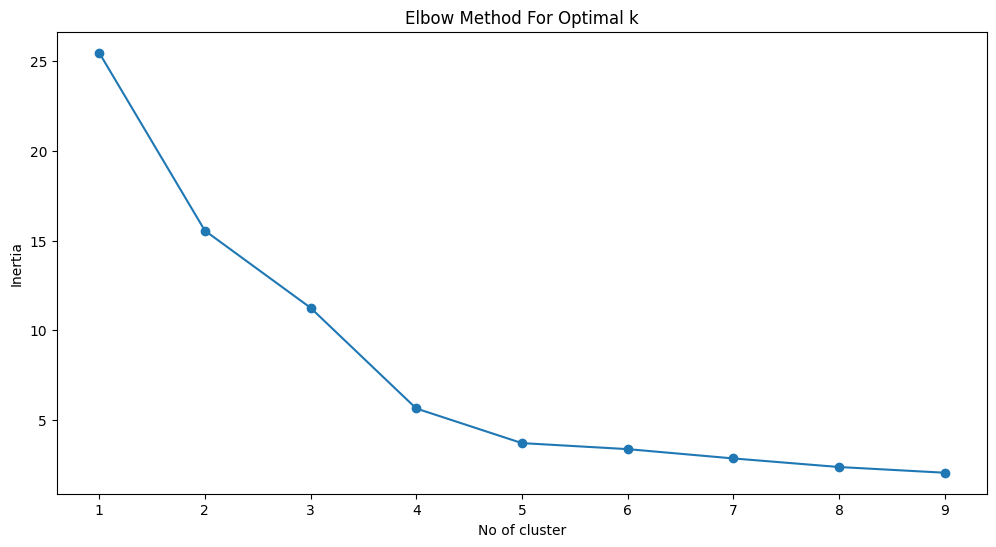

In [16]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['Inertia'],marker = 'o')
plt.xlabel('No of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show

In [17]:
# Number of cluster as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(norm_data)
pred = kmeans.predict(norm_data)
norm_data['cluster']=pred

In [18]:
print(norm_data)

       Gender       Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    0.000000  0.413925            0.326783                0.849635        0
1    0.000000  0.247025            0.176446                0.952809        0
2    0.037987  0.759737            0.607790                0.227921        1
3    0.012203  0.280676            0.195253                0.939653        0
4    0.018728  0.580581            0.318383                0.749137        1
..        ...       ...                 ...                     ...      ...
195  0.006762  0.236686            0.811496                0.534235        0
196  0.007315  0.329196            0.921748                0.204833        2
197  0.000000  0.213924            0.842324                0.494698        0
198  0.000000  0.225615            0.965915                0.126909        2
199  0.000000  0.184087            0.840665                0.509308        0

[200 rows x 5 columns]


In [19]:
def plot_clusters(str_x, str_y, clusters):
    plt.figure(figsize=(5, 5), dpi=120)
    try:
        x, y = seg(str_x, str_y, clusters)
        for i in range(clusters):
            plt.scatter(x[i], y[i], label='Cluster {}'.format(i))
        plt.xlabel(str_x)
        plt.ylabel(str_y)
        plt.legend()
        plt.show()
    except KeyError as e:
        print(f"KeyError: {e}. Check if the 'Cluster' column exists in 'norm_data'.")
    except Exception as e:
        print(f"An error occurred: {e}")

def seg(str_x, str_y, clusters):
    x = []
    y = []
    print(norm_data.columns)  # Debug statement to list all columns
    for i in range(clusters):
        try:
            x.append(data[str_x][norm_data['cluster'] == i])
            y.append(data[str_y][norm_data['cluster'] == i])
        except KeyError as e:
            print(f"KeyError: {e}. Column not found in DataFrame.")
            raise
    return x, y

# Assuming 'data' and 'norm_data' are defined DataFrames
# plot_clusters('Age', 'Spending Score (1-100)', 3)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


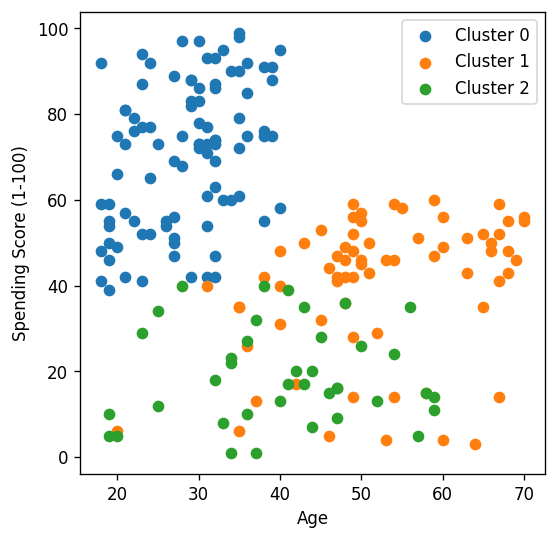

In [20]:
# Age vs Spending Score
plot_clusters('Age','Spending Score (1-100)',3)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


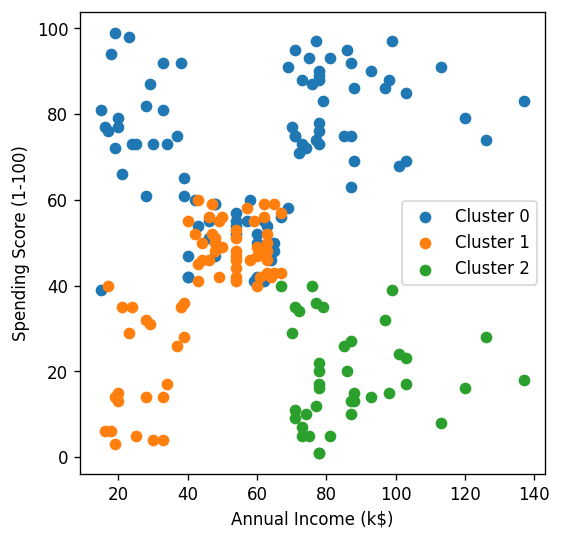

In [21]:
# Annual Income vs Spending Score
plot_clusters('Annual Income (k$)','Spending Score (1-100)',3)

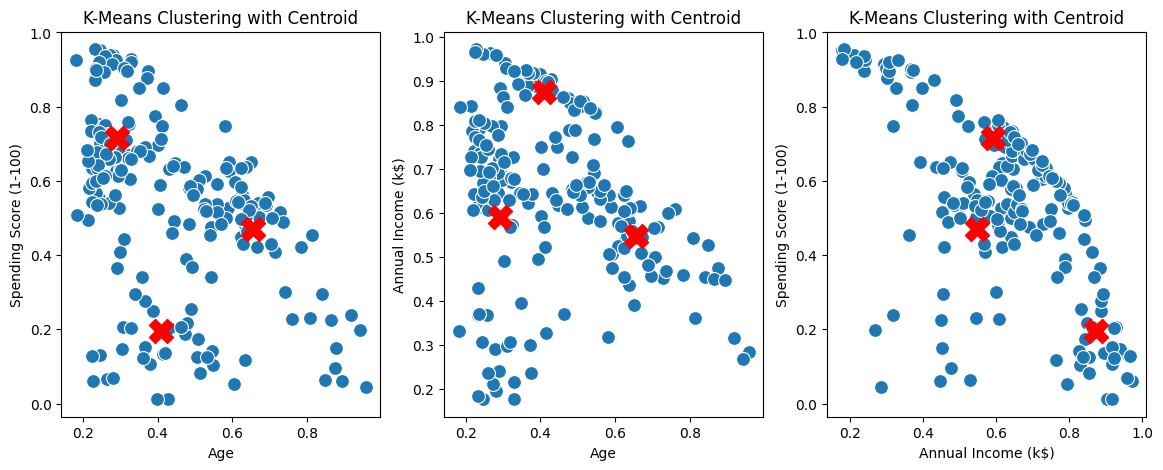

In [22]:
# Plotting the results
feature_x = 'Age'
feature_y = 'Annual Income (k$)'
feature_z = 'Spending Score (1-100)'

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_z)

plt.subplot(1,3,2)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_y ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.subplot(1,3,3)
sns.scatterplot(data=norm_data,x = feature_y, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_y)
plt.ylabel(feature_z)
plt.show()

In [23]:
kmeans.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [24]:
data['Label'] = kmeans.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,0
4,1,31,17,40,1


In [25]:
data.Label.value_counts()

Label
0    93
1    68
2    39
Name: count, dtype: int64

In [26]:
for k in range(3):
    print(f'cluster nb : {k}')
    print(data[data['Label'] == k].describe())
    print('\n\n')

cluster nb : 0
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  93.000000  93.000000           93.000000               93.000000   93.0
mean    0.569892  28.430108           60.709677               70.774194    0.0
std     0.497774   6.203782           27.594730               16.845286    0.0
min     0.000000  18.000000           15.000000               39.000000    0.0
25%     0.000000  23.000000           39.000000               55.000000    0.0
50%     1.000000  29.000000           62.000000               73.000000    0.0
75%     1.000000  32.000000           78.000000               86.000000    0.0
max     1.000000  40.000000          137.000000               99.000000    0.0



cluster nb : 1
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  68.000000  68.000000           68.000000               68.000000   68.0
mean    0.588235  52.250000           45.485294               39.852941    1.0
std     0.495812  1